In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler


In [4]:
Train=pd.read_csv("Train.csv")

# print(Train)
Train.head()


,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [5]:
Test=pd.read_csv("Test.csv")
Test2 =pd.read_csv("Test.csv")

Test.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
0,Id_r90136smvl,2022-08-03,3,other,NaN,Urban,KwaZulu-Natal,1.0,0.0,0.0,2.0,0 - 29 %,NaN,50 - 59 %,NaN,40 - 49 %,0,1,2002,12
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,0.0,NaN,NaN,NaN,40 - 49 %,NaN,NaN,1,1,1989,12
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1989,12
3,Id_uhgink7iha,2023-02-16,4,studying,NaN,Urban,Gauteng,1.0,0.0,0.0,1.0,NaN,80 - 100 %,60 - 69 %,NaN,NaN,0,1,2002,11
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,1,1,1993,10


In [6]:
Train.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
       'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female',
       'Sa_citizen', 'Birthyear', 'Birthmonth', 'Target'],
      dtype='object')

In [7]:
Test.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
       'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female',
       'Sa_citizen', 'Birthyear', 'Birthmonth'],
      dtype='object')

In [8]:
Train["Sa_citizen"].value_counts()

1    4018
0       2
Name: Sa_citizen, dtype: int64

In [9]:
Train["Geography"].value_counts()

Urban     2797
Rural      803
Suburb     420
Name: Geography, dtype: int64

In [10]:
Train["Status"].value_counts()

unemployed                1775
studying                   966
wage employed              763
other                      278
self employed              200
employment programme        31
wage and self employed       7
Name: Status, dtype: int64

In [11]:
Train["Math"].value_counts()

0 - 29 %      321
30 - 39 %     299
40 - 49 %     197
50 - 59 %      99
60 - 69 %      49
70 - 79 %      21
80 - 100 %     11
Name: Math, dtype: int64

In [12]:

Train = pd.DataFrame(Train)

# Columns to fill null values with backward filling
columns_to_fill = ['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science','Tenure', 'Matric','Diploma','Degree','Schoolquintile']

# Perform backward filling in the specified columns
Train[columns_to_fill] = Train[columns_to_fill].fillna(method='bfill', axis=0)

Train.head()


,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,427.0,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,60 - 69 %,50 - 59 %,40 - 49 %,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,40 - 49 %,40 - 49 %,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,810.0,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,40 - 49 %,40 - 49 %,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,60 - 69 %,40 - 49 %,40 - 49 %,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,1826.0,Urban,Limpopo,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,60 - 69 %,40 - 49 %,40 - 49 %,1,1,1998,12,0


In [13]:

Test = pd.DataFrame(Test)

# Columns to fill null values with backward filling
columns_to_fill = ['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science','Tenure', 'Matric','Diploma','Degree','Schoolquintile']

# Perform backward filling in the specified columns
Test[columns_to_fill] = Test[columns_to_fill].fillna(method='bfill', axis=0)

Test.head()


,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
0,Id_r90136smvl,2022-08-03,3,other,979.0,Urban,KwaZulu-Natal,1.0,0.0,0.0,2.0,0 - 29 %,80 - 100 %,50 - 59 %,50 - 59 %,40 - 49 %,0,1,2002,12
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,0.0,1.0,40 - 49 %,80 - 100 %,40 - 49 %,50 - 59 %,30 - 39 %,1,1,1989,12
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,40 - 49 %,80 - 100 %,60 - 69 %,50 - 59 %,30 - 39 %,1,1,1989,12
3,Id_uhgink7iha,2023-02-16,4,studying,613.0,Urban,Gauteng,1.0,0.0,0.0,1.0,40 - 49 %,80 - 100 %,60 - 69 %,50 - 59 %,30 - 39 %,0,1,2002,11
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0.0,0.0,0.0,5.0,40 - 49 %,50 - 59 %,60 - 69 %,50 - 59 %,30 - 39 %,1,1,1993,10


In [14]:
Test.to_csv('Cleaned_test.csv')
Test.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
0,Id_r90136smvl,2022-08-03,3,other,979.0,Urban,KwaZulu-Natal,1.0,0.0,0.0,2.0,0 - 29 %,80 - 100 %,50 - 59 %,50 - 59 %,40 - 49 %,0,1,2002,12
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,0.0,1.0,40 - 49 %,80 - 100 %,40 - 49 %,50 - 59 %,30 - 39 %,1,1,1989,12
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,40 - 49 %,80 - 100 %,60 - 69 %,50 - 59 %,30 - 39 %,1,1,1989,12
3,Id_uhgink7iha,2023-02-16,4,studying,613.0,Urban,Gauteng,1.0,0.0,0.0,1.0,40 - 49 %,80 - 100 %,60 - 69 %,50 - 59 %,30 - 39 %,0,1,2002,11
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0.0,0.0,0.0,5.0,40 - 49 %,50 - 59 %,60 - 69 %,50 - 59 %,30 - 39 %,1,1,1993,10


In [15]:
Train.to_csv('cleaned_train.csv')
Train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,427.0,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,60 - 69 %,50 - 59 %,40 - 49 %,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,40 - 49 %,40 - 49 %,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,810.0,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,40 - 49 %,40 - 49 %,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,60 - 69 %,40 - 49 %,40 - 49 %,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,1826.0,Urban,Limpopo,1.0,0.0,0.0,...,30 - 39 %,60 - 69 %,60 - 69 %,40 - 49 %,40 - 49 %,1,1,1998,12,0


In [16]:
cleaned_test=pd.read_csv("cleaned_test.csv")

cleaned_test.head()

,Unnamed: 0,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,...,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
0,0,Id_r90136smvl,2022-08-03,3,other,979.0,Urban,KwaZulu-Natal,1.0,0.0,...,2.0,0 - 29 %,80 - 100 %,50 - 59 %,50 - 59 %,40 - 49 %,0,1,2002,12
1,1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,...,1.0,40 - 49 %,80 - 100 %,40 - 49 %,50 - 59 %,30 - 39 %,1,1,1989,12
2,2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0.0,0.0,...,1.0,40 - 49 %,80 - 100 %,60 - 69 %,50 - 59 %,30 - 39 %,1,1,1989,12
3,3,Id_uhgink7iha,2023-02-16,4,studying,613.0,Urban,Gauteng,1.0,0.0,...,1.0,40 - 49 %,80 - 100 %,60 - 69 %,50 - 59 %,30 - 39 %,0,1,2002,11
4,4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0.0,0.0,...,5.0,40 - 49 %,50 - 59 %,60 - 69 %,50 - 59 %,30 - 39 %,1,1,1993,10


In [17]:
cleaned_train=pd.read_csv("cleaned_train.csv")

cleaned_train.head()

,Unnamed: 0,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,0,Id_eqz61wz7yn,2022-02-23,2,studying,427.0,Rural,Mpumalanga,1.0,0.0,...,0 - 29 %,60 - 69 %,50 - 59 %,40 - 49 %,0 - 29 %,1,1,2000,5,0
1,1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,...,30 - 39 %,60 - 69 %,40 - 49 %,40 - 49 %,30 - 39 %,1,1,1989,4,1
2,2,Id_9h0isj38y4,2022-08-08,3,other,810.0,Urban,Free State,1.0,0.0,...,30 - 39 %,60 - 69 %,40 - 49 %,40 - 49 %,30 - 39 %,0,1,1996,7,1
3,3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,1.0,0.0,...,30 - 39 %,60 - 69 %,60 - 69 %,40 - 49 %,40 - 49 %,0,1,2000,1,0
4,4,Id_g4elxibjej,2023-03-22,4,studying,1826.0,Urban,Limpopo,1.0,0.0,...,30 - 39 %,60 - 69 %,60 - 69 %,40 - 49 %,40 - 49 %,1,1,1998,12,0


In [18]:
#Determnin no of columns and rows

Train.shape

(4020, 21)

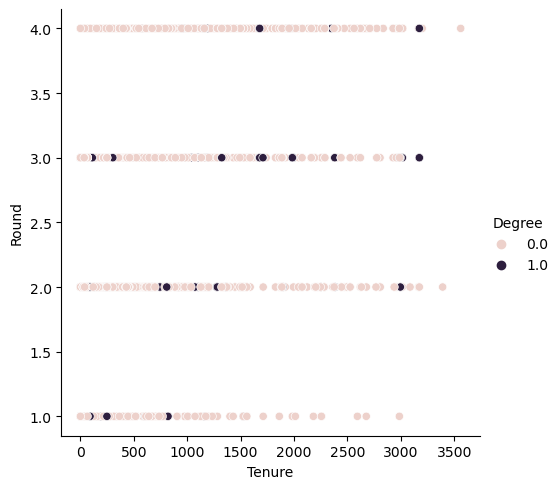

In [19]:
sns.relplot(x='Tenure',y='Round',hue='Degree',data=Train)

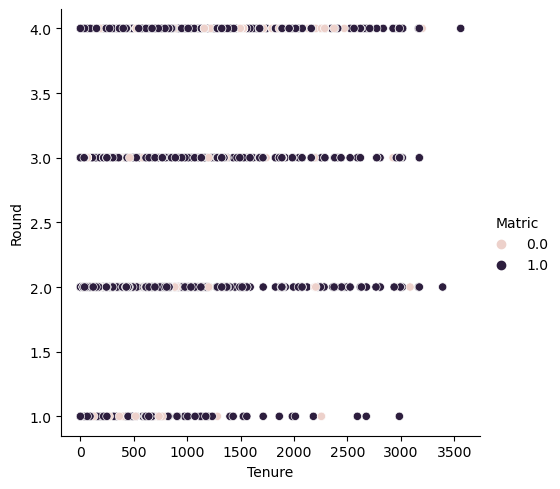

In [20]:
sns.relplot(x='Tenure',y='Round',hue='Matric',data=Train)

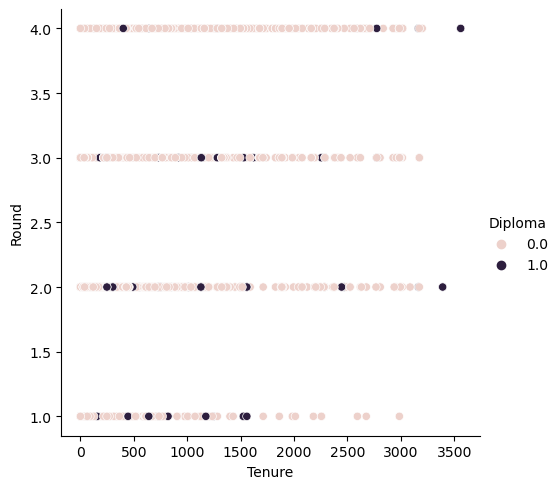

In [21]:
sns.relplot(x='Tenure',y='Round',hue='Diploma',data=Train)

In [22]:
#generates summary statistics
Train.describe()


,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target
count,4020.000000,4020.000000,4019.000000,4018.000000,4018.000000,4019.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,3.129851,594.434826,0.851953,0.079890,0.080637,2.682508,0.564428,0.999502,1997.462935,5.344030,0.271891
std,0.978014,626.814340,0.355191,0.271157,0.272311,1.321688,0.495893,0.022302,4.378334,3.805916,0.444989
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,0.000000
25%,2.000000,97.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1995.000000,1.000000,0.000000
50%,3.000000,401.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1999.000000,5.000000,0.000000
75%,4.000000,826.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2000.000000,9.000000,1.000000
max,4.000000,3560.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2004.000000,12.000000,1.000000


<Axes: xlabel='Round'>

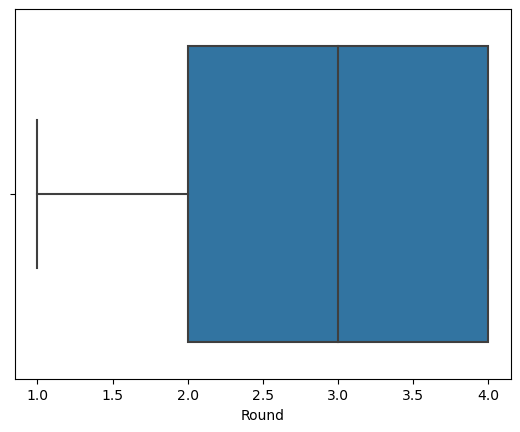

In [23]:
sns.boxplot(x=Train['Round'])

/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


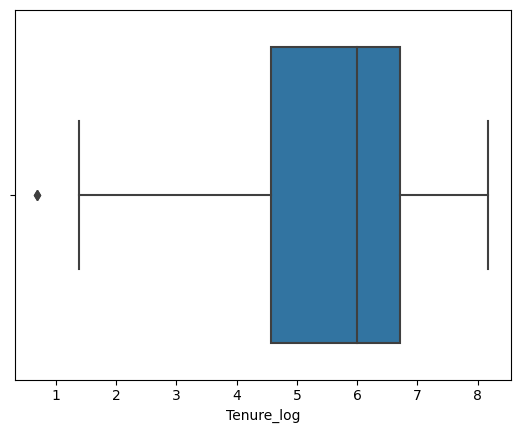

In [24]:
Train = pd.DataFrame(Train)

# Log transformation of the 'Tenure' column
Train['Tenure_log'] = np.log(Train['Tenure'])

# Create the boxplot using Seaborn
sns.boxplot(x=Train['Tenure_log'])

# Show the plot
import matplotlib.pyplot as plt
plt.show()


/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


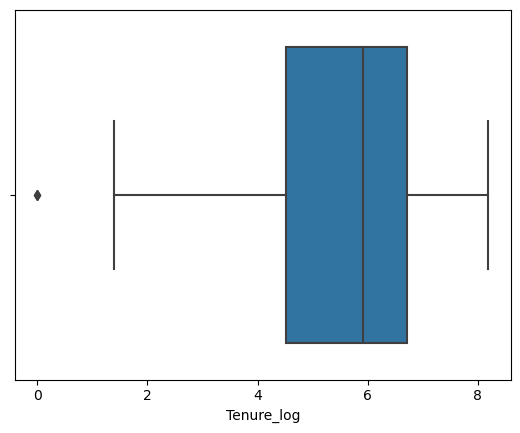

In [25]:
Test = pd.DataFrame(Test)

# Log transformation of the 'Tenure' column
Test['Tenure_log'] = np.log(Test['Tenure'])

# Create the boxplot using Seaborn
sns.boxplot(x=Test['Tenure_log'])

# Show the plot
import matplotlib.pyplot as plt
plt.show()


In [26]:
label_encoder = LabelEncoder()

#Iterate over each column in the DataFrame and encode the values
for col in Train.columns:
    Train[col] = label_encoder.fit_transform(Train[col])

Train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target,Tenure_log
0,1628,11,1,3,224,0,5,1,0,0,...,4,2,1,0,1,1,25,4,0,224
1,2269,45,3,4,224,1,6,1,0,0,...,4,1,1,1,1,1,14,3,1,224
2,1016,36,2,1,364,2,1,1,0,0,...,4,1,1,1,0,1,21,6,1,364
3,616,26,1,4,364,2,0,1,0,0,...,4,3,1,2,0,1,25,0,0,364
4,1771,75,3,3,553,2,4,1,0,0,...,4,3,1,2,1,1,23,11,0,553


In [27]:
label_encoder = LabelEncoder()

#Iterate over each column in the DataFrame and encode the values
for col in Test.columns:
    Test[col] = label_encoder.fit_transform(Test[col])

Test.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Tenure_log
0,1464,33,2,1,278,2,3,1,0,0,...,0,6,2,2,2,0,1,25,11,278
1,1738,72,3,4,278,2,8,1,0,0,...,2,6,1,2,1,1,1,12,11,278
2,547,70,3,4,129,2,3,0,0,0,...,2,6,3,2,1,1,1,12,11,129
3,1634,53,3,3,206,2,2,1,0,0,...,2,6,3,2,1,0,1,25,10,206
4,281,76,3,4,206,2,2,0,0,0,...,2,3,3,2,1,1,1,16,9,206


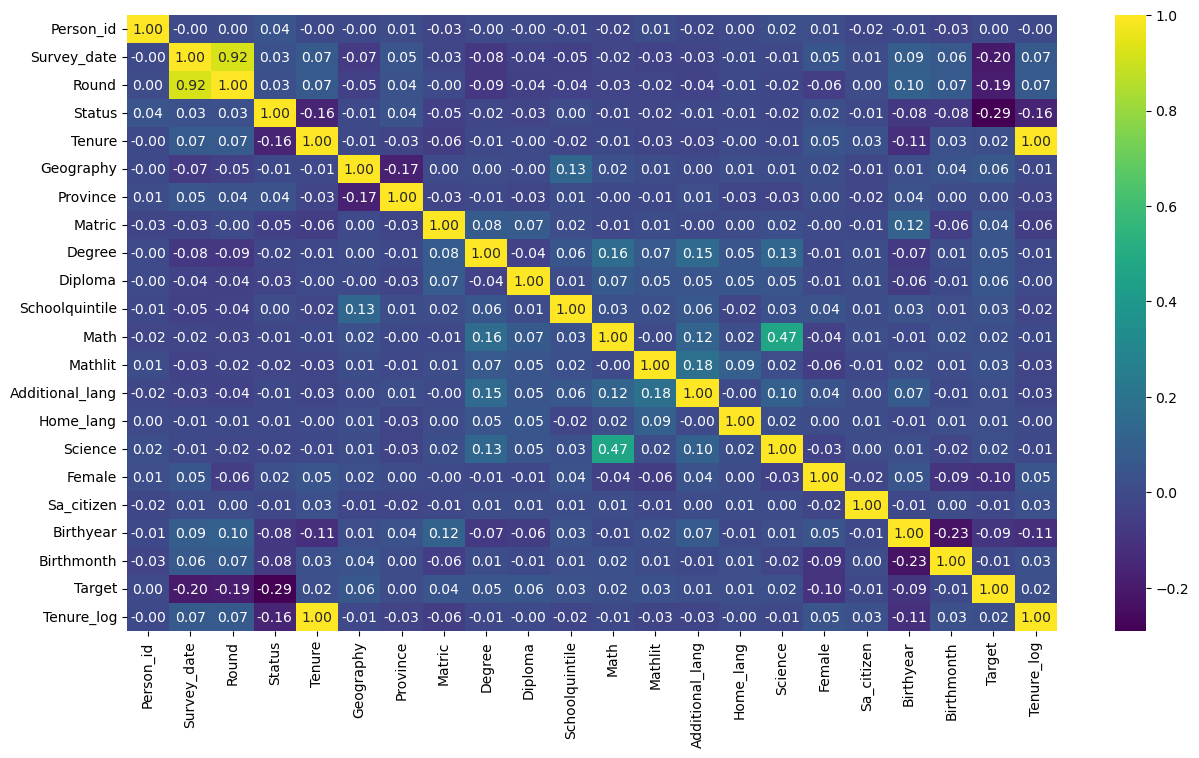

In [28]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'day' with various columns including numeric and non-numeric

# Select only numeric columns from the DataFrame
numeric_columns = Train.select_dtypes(include='number')

# Plot the correlation heatmap for the numeric columns
plt.figure(figsize=(15, 8))
dataplot = sb.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap='viridis')

# Display the heatmap
plt.show()


In [29]:
print("Skewness:" ,Train['Tenure'].skew()) 
print("Kurtosis:" ,Train['Tenure'].kurt()) #No. of outlier over 3 is bad

Skewness: 0.4285341456603925
Kurtosis: -0.9783423788578798


In [30]:
X_test=Test
X = Train.drop(['Person_id','Target','Tenure', 'Geography', 'Matric','Mathlit','Math', 'Additional_lang', 'Birthmonth','Schoolquintile'], axis=1)
X_test = X_test.drop(['Person_id','Geography', 'Tenure','Matric','Mathlit','Math', 'Additional_lang', 'Birthmonth','Schoolquintile'], axis=1)

y = Train['Target']

In [31]:
X_test

,Survey_date,Round,Status,Province,Degree,Diploma,Home_lang,Science,Female,Sa_citizen,Birthyear,Tenure_log
0,33,2,1,3,0,0,2,2,0,1,25,278
1,72,3,4,8,0,0,2,1,1,1,12,278
2,70,3,4,3,0,0,2,1,1,1,12,129
3,53,3,3,2,0,0,2,1,0,1,25,206
4,76,3,4,2,0,0,2,1,1,1,16,206
...,...,...,...,...,...,...,...,...,...,...,...,...
1929,35,2,4,2,0,0,2,1,1,1,23,274
1930,65,3,3,2,0,0,2,1,1,1,23,236
1931,43,3,4,5,0,0,2,3,0,1,23,236
1932,63,3,3,6,0,0,2,7,1,1,23,3


In [32]:
# #Step 2: Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X)

# scalertest = StandardScaler()
# X_test_scaled = scalertest.fit_transform(X_test)
# X_val_scaled = scaler.transform(X_val)

# Decision Tree

In [33]:
# Step 3: Create and train the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

# Step 4: Make predictions on the validation dataset for Decision Tree
y_pred_tree =  decision_tree.predict_proba(X_test)[:, 1]
y_pred_tree_train =  decision_tree.predict_proba(X)[:, 1]
y_pred_tree

# # Step 5: Evaluate the model's performance for Decision Tree
# accuracy_tree = accuracy_score(y, y_pred_tree_train)
# print("Accuracy of the Decision Tree Model: {:.2f}".format(accuracy_tree))

# classification_rep_tree = classification_report(y, y_pred_tree_train, zero_division=1)
# print("Classification Report for Decision Tree:")
# print(classification_rep_tree)

array([1., 0., 1., ..., 0., 1., 1.])

In [34]:
decision_tree.fit(X_train_scaled, y)

NameError: name 'X_train_scaled' is not defined

In [ ]:
predictions = decision_tree.predict(Test)
print(predictions[:10])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 21 features, but DecisionTreeClassifier is expecting 14 features as input.

# Logistic Regression

In [35]:
# Step 1: Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

# Step 2: Create and train the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)
rf.fit(X, y)

# Step 3: Make predictions on the training dataset using the trained Logistic Regression model
y_pred_logistic = rf.predict_proba(X_test)[:, 1]
y_pred_logistic
# # # Step 4: Evaluate the model's performance on the training dataset
# accuracy_logistic = accuracy_score(y, y_pred_logistic)
# print("Accuracy of the Logistic Regression Model: {:.2f}".format(accuracy_logistic))

# classification_rep_logistic = classification_report(y, y_pred_logistic, zero_division=1)
# print("Classification Report for Logistic Regression:")
# print(classification_rep_logistic)


array([0.81058319, 0.21763976, 0.15986076, ..., 0.18563335, 0.22353571,
       0.35564003])

In [37]:
import pickle
dbfile = open('rf.pkl', 'wb')
pickle.dump(rf, dbfile) 
pickle.close()

In [ ]:
file = open('rf', 'rb')
rf2 = pickle.load(file)

y_pred_logistic = rf2.predict_proba(X_test)[:, 1]
y_pred_logistic

array([0.81058319, 0.21763976, 0.15986076, ..., 0.18563335, 0.22353571,
       0.35564003])

In [ ]:
logistic_reg.fit(X_train_scaled, y)

NameError: name 'logistic_reg' is not defined

In [ ]:
predictions = logistic_reg.predict(X_train_scaled)
print(predictions[:11])

NameError: name 'logistic_reg' is not defined

In [ ]:
y_pred_tree

array([1., 0., 0., ..., 0., 1., 1.])

In [ ]:
# Create a DataFrame df_submission with two columns "ID" and "Target"
df_final = pd.DataFrame({"ID": Test2["Person_id"], "Target": y_pred_logistic.astype(float)})
print(df_final.head())

NameError: name 'y_pred_logistic' is not defined

In [ ]:
df_final.to_csv("submission.csv", index=False)